In [57]:
import os
import urllib
import csv
from concurrent.futures import ThreadPoolExecutor, wait, ALL_COMPLETED
from astropy.io import fits
import matplotlib.pyplot as plt
import itertools
import pandas as pd

In [13]:
def download(url,to_dir,filename):
    fdir = to_dir + filename.split('/')[-1]
    print('start downloading %s'%url)
    urllib.request.urlretrieve(url, filename=fdir)
    print('finish downloading %s'%url)

In [19]:
# download_list = 'star.csv'
# download_list = 'galaxy.csv'
download_list = 'qso.csv'
# to_dir = './LAMOST_spectra/star/'
# to_dir = './LAMOST_spectra/galaxy/'
to_dir = './LAMOST_spectra/qso/'
url_reader = itertools.islice(csv.DictReader(open(download_list),delimiter='|'),2000)
filenames = [row['obsfits_file'].split('/')[-1] for row in url_reader]
print(filenames)

['spec-57755-GAC085S03M1_sp03-181.fits.gz', 'spec-57755-HD093318N282204M02_sp02-107.fits.gz', 'spec-57755-HD093318N282204M02_sp02-169.fits.gz', 'spec-57755-HD093318N282204M02_sp02-181.fits.gz', 'spec-57755-HD093318N282204M02_sp02-215.fits.gz', 'spec-57755-HD093318N282204M02_sp12-053.fits.gz', 'spec-57755-HD093318N282204M02_sp12-099.fits.gz', 'spec-57755-HD093318N282204M02_sp12-115.fits.gz', 'spec-57755-HD093318N282204M02_sp12-143.fits.gz', 'spec-57755-HD093318N282204M02_sp12-158.fits.gz', 'spec-57755-HD093318N282204M02_sp12-195.fits.gz', 'spec-57755-HD093318N282204M02_sp12-247.fits.gz', 'spec-57755-HD093318N282204M02_sp01-041.fits.gz', 'spec-57755-HD093318N282204M02_sp01-029.fits.gz', 'spec-57755-HD093318N282204M02_sp01-066.fits.gz', 'spec-57755-HD093318N282204M02_sp13-018.fits.gz', 'spec-57755-HD093318N282204M02_sp13-035.fits.gz', 'spec-57755-HD093318N282204M02_sp13-073.fits.gz', 'spec-57755-HD093318N282204M02_sp13-177.fits.gz', 'spec-57755-HD093318N282204M02_sp13-192.fits.gz', 'spec-

In [16]:
url_reader = itertools.islice(csv.DictReader(open(download_list),delimiter='|'),2000)
urls = ['http://dr5.lamost.org/v3/spectrum/fits/'+ row['catalogue_obsid'] for row in url_reader]
print(urls)

['http://dr5.lamost.org/v3/spectrum/fits/505303181', 'http://dr5.lamost.org/v3/spectrum/fits/505402107', 'http://dr5.lamost.org/v3/spectrum/fits/505402169', 'http://dr5.lamost.org/v3/spectrum/fits/505402181', 'http://dr5.lamost.org/v3/spectrum/fits/505402215', 'http://dr5.lamost.org/v3/spectrum/fits/505412053', 'http://dr5.lamost.org/v3/spectrum/fits/505412099', 'http://dr5.lamost.org/v3/spectrum/fits/505412115', 'http://dr5.lamost.org/v3/spectrum/fits/505412143', 'http://dr5.lamost.org/v3/spectrum/fits/505412158', 'http://dr5.lamost.org/v3/spectrum/fits/505412195', 'http://dr5.lamost.org/v3/spectrum/fits/505412247', 'http://dr5.lamost.org/v3/spectrum/fits/505401041', 'http://dr5.lamost.org/v3/spectrum/fits/505401029', 'http://dr5.lamost.org/v3/spectrum/fits/505401066', 'http://dr5.lamost.org/v3/spectrum/fits/505413018', 'http://dr5.lamost.org/v3/spectrum/fits/505413035', 'http://dr5.lamost.org/v3/spectrum/fits/505413073', 'http://dr5.lamost.org/v3/spectrum/fits/505413177', 'http://dr5

In [17]:
for (url,filename) in zip(urls[:2000],filenames[:2000]):
    download(url,to_dir,filename)

start downloading http://dr5.lamost.org/v3/spectrum/fits/527003174
finish downloading http://dr5.lamost.org/v3/spectrum/fits/527003174
start downloading http://dr5.lamost.org/v3/spectrum/fits/527003181
finish downloading http://dr5.lamost.org/v3/spectrum/fits/527003181
start downloading http://dr5.lamost.org/v3/spectrum/fits/527003191
finish downloading http://dr5.lamost.org/v3/spectrum/fits/527003191
start downloading http://dr5.lamost.org/v3/spectrum/fits/527003231
finish downloading http://dr5.lamost.org/v3/spectrum/fits/527003231
start downloading http://dr5.lamost.org/v3/spectrum/fits/527003249
finish downloading http://dr5.lamost.org/v3/spectrum/fits/527003249
start downloading http://dr5.lamost.org/v3/spectrum/fits/527010014
finish downloading http://dr5.lamost.org/v3/spectrum/fits/527010014
start downloading http://dr5.lamost.org/v3/spectrum/fits/527010048
finish downloading http://dr5.lamost.org/v3/spectrum/fits/527010048
start downloading http://dr5.lamost.org/v3/spectrum/fit

In [58]:
# datadir='./LAMOST_spectra/star'
datadir='./LAMOST_spectra/qso'
# datadir='./LAMOST_spectra/galaxy'
filenames = os.listdir(datadir)
filepaths = [os.path.join(datadir, filename) for filename in filenames if 'fits'in filename]
wavelength_list =[]
flux_list=[]
for file in filepaths[:2000]:
    hdulist = fits.open(file)
    flux = hdulist[0].data[0]
    flux_list.append(flux)
    wavelength = hdulist[0].data[2]
    wavelength_list.append(wavelength)

In [59]:
wavelength_list

[array([3699.9863, 3700.8384, 3701.6907, ..., 9092.852 , 9094.945 ,
        9097.04  ], dtype=float32),
 array([3699.9863, 3700.8384, 3701.6907, ..., 9088.665 , 9090.759 ,
        9092.852 ], dtype=float32),
 array([3699.9863, 3700.8384, 3701.6907, ..., 9094.945 , 9097.04  ,
        9099.135 ], dtype=float32),
 array([3699.9863, 3700.8384, 3701.6907, ..., 9094.945 , 9097.04  ,
        9099.135 ], dtype=float32),
 array([3699.9863, 3700.8384, 3701.6907, ..., 9088.665 , 9090.759 ,
        9092.852 ], dtype=float32),
 array([3699.9863, 3700.8384, 3701.6907, ..., 9094.945 , 9097.04  ,
        9099.135 ], dtype=float32),
 array([3699.9863, 3700.8384, 3701.6907, ..., 9094.945 , 9097.04  ,
        9099.135 ], dtype=float32),
 array([3699.9863, 3700.8384, 3701.6907, ..., 9088.665 , 9090.759 ,
        9092.852 ], dtype=float32),
 array([3699.9863, 3700.8384, 3701.6907, ..., 9094.945 , 9097.04  ,
        9099.135 ], dtype=float32),
 array([3699.9863, 3700.8384, 3701.6907, ..., 9094.945 , 9097.04

In [60]:
flux_list

[array([35.755238, 10.768734, 28.535263, ...,  0.      ,  0.      ,
         0.      ], dtype=float32),
 array([27.647615, 27.669668, 26.74151 , ...,  0.      ,  0.      ,
         0.      ], dtype=float32),
 array([26.525257 ,  6.066294 , 11.249957 , ...,  0.4313904,  5.9130006,
         1.7555537], dtype=float32),
 array([28.675392 , 27.27903  , 16.561735 , ...,  2.0480344,  1.1989369,
         4.4658704], dtype=float32),
 array([28.059319 , 22.314842 , -7.7626915, ...,  0.       ,  0.       ,
         0.       ], dtype=float32),
 array([ 22.95227 ,  37.033875,  26.516071, ..., -15.85221 ,   0.      ,
          0.      ], dtype=float32),
 array([3.4546502e+00, 1.7117941e+01, 1.1858948e-02, ..., 2.1533811e+00,
        4.9881783e+00, 2.2063503e+00], dtype=float32),
 array([ 8.040149 ,  3.7858336, 14.765487 , ...,  0.       ,  0.       ,
         0.       ], dtype=float32),
 array([94.112175, 94.69917 , 85.28626 , ...,  0.      ,  0.      ,
         0.      ], dtype=float32),
 array([-7

每条光谱的波长值不完全一致，插值取共同值

In [27]:
WAVE_LENGTH_BEGIN = 3800
WAVE_LENGTH_END = 8900
WAVE_LENGTH_INTERVAL = 2
def calculate_interpolation(left, right, pos):
        ratio = (pos-left[0])/(right[0]-left[0])
        new_flux = (right[1]-left[1])*ratio + left[1]
        return pos, new_flux
    
def interpolation(wavelength,flux):
    pos_list = []
    target_list = []
    for pos in range(WAVE_LENGTH_BEGIN, WAVE_LENGTH_END, WAVE_LENGTH_INTERVAL):
        pos_list.append(pos)
    source = [(wavelength[i], flux[i]) for i in range(len(flux))]
    wave_index = 0
    right_wave_length = source[wave_index+1][0]
    
    for pos in pos_list:
        while pos > right_wave_length:
            wave_index += 1
            try:
                right_wave_length = source[wave_index+1][0]
            except Exception:
                raise 
        if pos == right_wave_length:
            target_list.append((source[wave_index + 1][1]))
        else:
            new_point = calculate_interpolation(source[wave_index],source[wave_index + 1],
                                                                             pos)
            target_list.append(new_point[1])
    return target_list

In [28]:
interpolated_qso =[]

In [29]:
for wavelength,flux in zip(wavelength_list, flux_list):
    try:
        interpolated_qso.append(interpolation(wavelength,flux))
    except Exception:
        print(wavelength,len(flux))

In [33]:
interpolated_qso = pd.DataFrame(interpolated_qso)

In [34]:
interpolated_qso

0          1          2          3          4          5     \
0     18.335104  33.349667  27.950824  29.384294  16.556414  26.811592   
1      9.350756  16.335346  10.903193   8.956035   3.783463   8.735664   
2     -2.325537 -13.544605  -3.333942  -4.236966  13.217605  10.690576   
3      6.129340  -3.771438   0.876370   1.681824   7.953038  14.867027   
4     30.119249  14.071393   8.103674  25.089128 -21.379706  76.049051   
...         ...        ...        ...        ...        ...        ...   
1995  12.272358  14.401710   8.348493   3.999785   7.805858  10.378903   
1996  17.131297  15.425591   1.065114  13.226381  24.931888  -3.459890   
1997  26.874739  40.125442  34.200190  20.487716  35.860423  29.905093   
1998   9.085646   7.687270   7.489888  10.274753  14.319158   8.921560   
1999  26.726659  17.087841  21.602434 -24.680525  17.402617  16.349205   

            6           7           8          9     ...       2540  \
0      23.410127   24.627176   24.215887  18.271816  ...  28.684748   
1      11.484191    6.584599   15.438611   6.534399  ...  14.301371   
2     -10.134208   12.379485    3.207430   2.604835  ...  23.401298   
3       5.327331    9.920513   -2.641304   4.511715  ...  28.266409   
4     138.788145  157.043790  110.638485  25.602925  ...  12.205490   
...          ...         ...         ...        ...  ...        ...   
1995    8.300390    6.236607   10.736172  13.276337  ...  11.771546   
1996   13.903676    9.231472   -0.356554   4.398799  ...  11.341078   
1997   22.716889   50.714312   34.052660  27.823174  ...  54.463825   
1998    8.872685   14.509934   12.725191  14.277163  ...  56.462394   
1999   19.275085   42.805796   17.907182  20.883147  ...  16.792606   

           2541       2542       2543       2544       2545       2546  \
0     28.671939  27.854405  22.775750  28.590113  43.727947  45.066552   
1     18.643746  31.313822  24.696730   5.234182  19.058665  -9.720206   
2     20.963465  22.941938  19.162610  26.619912  26.660982  18.305945   
3     31.167711  31.688486  30.216272  39.387669  37.598865  32.986569   
4      9.924608   5.862672  16.356785   9.959258   6.401095   7.991880   
...         ...        ...        ...        ...        ...        ...   
1995  10.476894  11.973159   9.998501   8.236958   9.594691   9.983817   
1996  13.134035   7.947309   7.334852  15.752672  14.309376  14.047401   
1997  54.740446  53.308745  56.202765  67.134944  76.876456  75.582606   
1998  66.399483  64.435336  42.545179  58.755829  52.480218  55.230266   
1999  14.830044  17.315841  26.893963  16.516972  14.862856  23.073962   

           2547       2548       2549  
0     28.692035  31.585217  28.910661  
1     13.129704  12.808586  13.269795  
2     15.035319  22.174495  21.977419  
3     30.798496  28.427388  30.493782  
4      8.166966   9.103532   7.984735  
...         ...        ...        ...  
1995   9.360460   8.949966   9.072508  
1996  10.579181  10.177056   9.870089  
1997  63.546417  59.237117  56.230476  
1998  43.468178  45.678497  49.935323  
1999  18.715192  18.580715  16.768742  

[2000 rows x 2550 columns]

In [35]:
interpolated_spectra = interpolated_qso

In [36]:
interpolated_spectra['type']=2

In [37]:
interpolated_spectra.loc[:2,'type']=2

In [38]:
interpolated_spectra

0          1          2          3          4          5  \
0     18.335104  33.349667  27.950824  29.384294  16.556414  26.811592   
1      9.350756  16.335346  10.903193   8.956035   3.783463   8.735664   
2     -2.325537 -13.544605  -3.333942  -4.236966  13.217605  10.690576   
3      6.129340  -3.771438   0.876370   1.681824   7.953038  14.867027   
4     30.119249  14.071393   8.103674  25.089128 -21.379706  76.049051   
...         ...        ...        ...        ...        ...        ...   
1995  12.272358  14.401710   8.348493   3.999785   7.805858  10.378903   
1996  17.131297  15.425591   1.065114  13.226381  24.931888  -3.459890   
1997  26.874739  40.125442  34.200190  20.487716  35.860423  29.905093   
1998   9.085646   7.687270   7.489888  10.274753  14.319158   8.921560   
1999  26.726659  17.087841  21.602434 -24.680525  17.402617  16.349205   

               6           7           8          9  ...       2541  \
0      23.410127   24.627176   24.215887  18.271816  ...  28.671939   
1      11.484191    6.584599   15.438611   6.534399  ...  18.643746   
2     -10.134208   12.379485    3.207430   2.604835  ...  20.963465   
3       5.327331    9.920513   -2.641304   4.511715  ...  31.167711   
4     138.788145  157.043790  110.638485  25.602925  ...   9.924608   
...          ...         ...         ...        ...  ...        ...   
1995    8.300390    6.236607   10.736172  13.276337  ...  10.476894   
1996   13.903676    9.231472   -0.356554   4.398799  ...  13.134035   
1997   22.716889   50.714312   34.052660  27.823174  ...  54.740446   
1998    8.872685   14.509934   12.725191  14.277163  ...  66.399483   
1999   19.275085   42.805796   17.907182  20.883147  ...  14.830044   

           2542       2543       2544       2545       2546       2547  \
0     27.854405  22.775750  28.590113  43.727947  45.066552  28.692035   
1     31.313822  24.696730   5.234182  19.058665  -9.720206  13.129704   
2     22.941938  19.162610  26.619912  26.660982  18.305945  15.035319   
3     31.688486  30.216272  39.387669  37.598865  32.986569  30.798496   
4      5.862672  16.356785   9.959258   6.401095   7.991880   8.166966   
...         ...        ...        ...        ...        ...        ...   
1995  11.973159   9.998501   8.236958   9.594691   9.983817   9.360460   
1996   7.947309   7.334852  15.752672  14.309376  14.047401  10.579181   
1997  53.308745  56.202765  67.134944  76.876456  75.582606  63.546417   
1998  64.435336  42.545179  58.755829  52.480218  55.230266  43.468178   
1999  17.315841  26.893963  16.516972  14.862856  23.073962  18.715192   

           2548       2549  type  
0     31.585217  28.910661     2  
1     12.808586  13.269795     2  
2     22.174495  21.977419     2  
3     28.427388  30.493782     2  
4      9.103532   7.984735     2  
...         ...        ...   ...  
1995   8.949966   9.072508     2  
1996  10.177056   9.870089     2  
1997  59.237117  56.230476     2  
1998  45.678497  49.935323     2  
1999  18.580715  16.768742     2  

[2000 rows x 2551 columns]

In [39]:
pos_list = []
for pos in range(WAVE_LENGTH_BEGIN, WAVE_LENGTH_END, WAVE_LENGTH_INTERVAL):
    pos_list.append(pos)

In [40]:
interpolated_spectra.iloc[0][:2550]

0       18.335104
1       33.349667
2       27.950824
3       29.384294
4       16.556414
          ...    
2545    43.727947
2546    45.066552
2547    28.692035
2548    31.585217
2549    28.910661
Name: 0, Length: 2550, dtype: float64

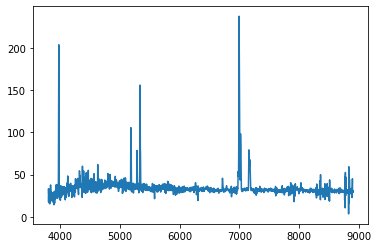

In [61]:
plt.plot(pos_list,interpolated_spectra.iloc[0][:2550])
plt.show()

In [46]:
spectra_means = interpolated_spectra.mean(1).to_numpy()
spectra_means

array([34.37146298, 15.15568047, 22.02823359, ..., 68.15535339,
       35.77232216, 27.07655685])

In [47]:
interpolated_spectra

0          1          2          3          4          5  \
0     18.335104  33.349667  27.950824  29.384294  16.556414  26.811592   
1      9.350756  16.335346  10.903193   8.956035   3.783463   8.735664   
2     -2.325537 -13.544605  -3.333942  -4.236966  13.217605  10.690576   
3      6.129340  -3.771438   0.876370   1.681824   7.953038  14.867027   
4     30.119249  14.071393   8.103674  25.089128 -21.379706  76.049051   
...         ...        ...        ...        ...        ...        ...   
1995  12.272358  14.401710   8.348493   3.999785   7.805858  10.378903   
1996  17.131297  15.425591   1.065114  13.226381  24.931888  -3.459890   
1997  26.874739  40.125442  34.200190  20.487716  35.860423  29.905093   
1998   9.085646   7.687270   7.489888  10.274753  14.319158   8.921560   
1999  26.726659  17.087841  21.602434 -24.680525  17.402617  16.349205   

               6           7           8          9  ...       2541  \
0      23.410127   24.627176   24.215887  18.271816  ...  28.671939   
1      11.484191    6.584599   15.438611   6.534399  ...  18.643746   
2     -10.134208   12.379485    3.207430   2.604835  ...  20.963465   
3       5.327331    9.920513   -2.641304   4.511715  ...  31.167711   
4     138.788145  157.043790  110.638485  25.602925  ...   9.924608   
...          ...         ...         ...        ...  ...        ...   
1995    8.300390    6.236607   10.736172  13.276337  ...  10.476894   
1996   13.903676    9.231472   -0.356554   4.398799  ...  13.134035   
1997   22.716889   50.714312   34.052660  27.823174  ...  54.740446   
1998    8.872685   14.509934   12.725191  14.277163  ...  66.399483   
1999   19.275085   42.805796   17.907182  20.883147  ...  14.830044   

           2542       2543       2544       2545       2546       2547  \
0     27.854405  22.775750  28.590113  43.727947  45.066552  28.692035   
1     31.313822  24.696730   5.234182  19.058665  -9.720206  13.129704   
2     22.941938  19.162610  26.619912  26.660982  18.305945  15.035319   
3     31.688486  30.216272  39.387669  37.598865  32.986569  30.798496   
4      5.862672  16.356785   9.959258   6.401095   7.991880   8.166966   
...         ...        ...        ...        ...        ...        ...   
1995  11.973159   9.998501   8.236958   9.594691   9.983817   9.360460   
1996   7.947309   7.334852  15.752672  14.309376  14.047401  10.579181   
1997  53.308745  56.202765  67.134944  76.876456  75.582606  63.546417   
1998  64.435336  42.545179  58.755829  52.480218  55.230266  43.468178   
1999  17.315841  26.893963  16.516972  14.862856  23.073962  18.715192   

           2548       2549  type  
0     31.585217  28.910661     2  
1     12.808586  13.269795     2  
2     22.174495  21.977419     2  
3     28.427388  30.493782     2  
4      9.103532   7.984735     2  
...         ...        ...   ...  
1995   8.949966   9.072508     2  
1996  10.177056   9.870089     2  
1997  59.237117  56.230476     2  
1998  45.678497  49.935323     2  
1999  18.580715  16.768742     2  

[2000 rows x 2551 columns]

In [48]:
interpolated_spectra_list = interpolated_spectra.to_numpy()
len(interpolated_spectra_list[0])

2551

In [49]:
standardised_spectra_list=[]
for i,spectra in enumerate(interpolated_spectra_list):
    standardised = spectra/spectra_means[i]
    standardised_spectra_list.append(standardised)

In [50]:
standardised_spectra = pd.DataFrame(standardised_spectra_list)
standardised_spectra

0         1         2         3         4         5         6     \
0     0.533440  0.970272  0.813199  0.854904  0.481691  0.780054  0.681092   
1     0.616980  1.077837  0.719413  0.590936  0.249640  0.576395  0.757748   
2    -0.105571 -0.614875 -0.151349 -0.192343  0.600030  0.485312 -0.460055   
3     0.213559 -0.131404  0.030534  0.058598  0.277100  0.517997  0.185615   
4     1.578259  0.737346  0.424635  1.314679 -1.120304  3.984996  7.272546   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.914807  1.073533  0.622314  0.298152  0.581865  0.773665  0.618728   
1996  1.458841  1.313589  0.090701  1.126312  2.123112 -0.294632  1.183988   
1997  0.394316  0.588735  0.501798  0.300603  0.526157  0.438778  0.333310   
1998  0.253985  0.214894  0.209377  0.287226  0.400286  0.249398  0.248032   
1999  0.987077  0.631094  0.797828 -0.911509  0.642719  0.603814  0.711874   

          7         8         9     ...      2541      2542      2543  \
0     0.716501  0.704535  0.531598  ...  0.834179  0.810393  0.662635   
1     0.434464  1.018668  0.431152  ...  1.230149  2.066144  1.629536   
2     0.561983  0.145605  0.118250  ...  0.951663  1.041479  0.869911   
3     0.345651 -0.092028  0.157197  ...  1.085946  1.104091  1.052796   
4     8.229148  5.797494  1.341602  ...  0.520053  0.307206  0.857101   
...        ...       ...       ...  ...       ...       ...       ...   
1995  0.464890  0.800297  0.989646  ...  0.780970  0.892504  0.745309   
1996  0.786120 -0.030363  0.374586  ...  1.118448  0.676765  0.624610   
1997  0.744099  0.499633  0.408232  ...  0.803172  0.782165  0.824627   
1998  0.405619  0.355727  0.399112  ...  1.856169  1.801262  1.189332   
1999  1.580917  0.661354  0.771263  ...  0.547708  0.639514  0.993256   

          2544      2545      2546      2547      2548      2549      2550  
0     0.831798  1.272217  1.311162  0.834763  0.918937  0.841124  0.058188  
1     0.345361  1.257526 -0.641357  0.866322  0.845134  0.875566  0.131964  
2     1.208445  1.210310  0.831022  0.682548  1.006640  0.997693  0.090793  
3     1.372346  1.310020  1.149318  1.073082  0.990467  1.062465  0.069684  
4     0.521868  0.335420  0.418777  0.427952  0.477028  0.418403  0.104801  
...        ...       ...       ...       ...       ...       ...       ...  
1995  0.614000  0.715208  0.744214  0.697748  0.667149  0.676284  0.149084  
1996  1.341442  1.218536  1.196227  0.900886  0.866642  0.840502  0.170313  
1997  0.985028  1.127959  1.108975  0.932376  0.869148  0.825034  0.029345  
1998  1.642494  1.467062  1.543939  1.215134  1.276923  1.395921  0.055909  
1999  0.610010  0.548920  0.852175  0.691195  0.686229  0.619308  0.073865  

[2000 rows x 2551 columns]

In [51]:
standardised_spectra.drop(2550,axis=1)

0         1         2         3         4         5         6     \
0     0.533440  0.970272  0.813199  0.854904  0.481691  0.780054  0.681092   
1     0.616980  1.077837  0.719413  0.590936  0.249640  0.576395  0.757748   
2    -0.105571 -0.614875 -0.151349 -0.192343  0.600030  0.485312 -0.460055   
3     0.213559 -0.131404  0.030534  0.058598  0.277100  0.517997  0.185615   
4     1.578259  0.737346  0.424635  1.314679 -1.120304  3.984996  7.272546   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.914807  1.073533  0.622314  0.298152  0.581865  0.773665  0.618728   
1996  1.458841  1.313589  0.090701  1.126312  2.123112 -0.294632  1.183988   
1997  0.394316  0.588735  0.501798  0.300603  0.526157  0.438778  0.333310   
1998  0.253985  0.214894  0.209377  0.287226  0.400286  0.249398  0.248032   
1999  0.987077  0.631094  0.797828 -0.911509  0.642719  0.603814  0.711874   

          7         8         9     ...      2540      2541      2542  \
0     0.716501  0.704535  0.531598  ...  0.834551  0.834179  0.810393   
1     0.434464  1.018668  0.431152  ...  0.943631  1.230149  2.066144   
2     0.561983  0.145605  0.118250  ...  1.062332  0.951663  1.041479   
3     0.345651 -0.092028  0.157197  ...  0.984859  1.085946  1.104091   
4     8.229148  5.797494  1.341602  ...  0.639572  0.520053  0.307206   
...        ...       ...       ...  ...       ...       ...       ...   
1995  0.464890  0.800297  0.989646  ...  0.877476  0.780970  0.892504   
1996  0.786120 -0.030363  0.374586  ...  0.965766  1.118448  0.676765   
1997  0.744099  0.499633  0.408232  ...  0.799113  0.803172  0.782165   
1998  0.405619  0.355727  0.399112  ...  1.578382  1.856169  1.801262   
1999  1.580917  0.661354  0.771263  ...  0.620190  0.547708  0.639514   

          2543      2544      2545      2546      2547      2548      2549  
0     0.662635  0.831798  1.272217  1.311162  0.834763  0.918937  0.841124  
1     1.629536  0.345361  1.257526 -0.641357  0.866322  0.845134  0.875566  
2     0.869911  1.208445  1.210310  0.831022  0.682548  1.006640  0.997693  
3     1.052796  1.372346  1.310020  1.149318  1.073082  0.990467  1.062465  
4     0.857101  0.521868  0.335420  0.418777  0.427952  0.477028  0.418403  
...        ...       ...       ...       ...       ...       ...       ...  
1995  0.745309  0.614000  0.715208  0.744214  0.697748  0.667149  0.676284  
1996  0.624610  1.341442  1.218536  1.196227  0.900886  0.866642  0.840502  
1997  0.824627  0.985028  1.127959  1.108975  0.932376  0.869148  0.825034  
1998  1.189332  1.642494  1.467062  1.543939  1.215134  1.276923  1.395921  
1999  0.993256  0.610010  0.548920  0.852175  0.691195  0.686229  0.619308  

[2000 rows x 2550 columns]

In [52]:
standardised_spectra['type']=3

In [348]:
standardised_spectra.to_csv(r'./LAMOST_spectra/qso_standardised.csv',index=False)

In [316]:
standardised_galaxy = standardised_spectra

In [336]:
standardised_galaxy.drop(2550,axis=1)
standardised_galaxy.to_csv(r'./LAMOST_spectra/galaxy_standardised.csv',index=False)

In [343]:
standardised_galaxy=standardised_galaxy.drop(2550,axis=1)

In [344]:
standardised_galaxy.to_csv(r'./LAMOST_spectra/galaxy_standardised.csv',index=False)

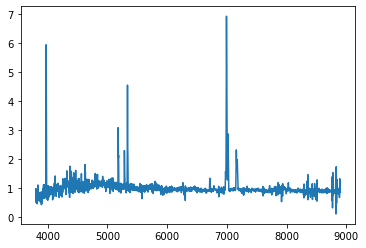

In [53]:
plt.plot(pos_list,standardised_spectra.iloc[0][:2550])

In [54]:
galaxies = pd.read_csv('./LAMOST_spectra/galaxy_standardised.csv')

In [55]:
galaxies

0         1         2         3         4         5         6  \
0     0.617188  1.078200  0.719656  0.591135  0.249724  0.576590  0.758004   
1    -0.105619 -0.615157 -0.151418 -0.192431  0.600306  0.485535 -0.460267   
2     0.608529  0.339985  0.612112  0.704888  0.435795  0.564308  0.521174   
3    -0.125019  1.094082  0.536864  1.023426  2.261266  2.303743  0.980048   
4     0.646874  0.441916  0.839619  0.434925  0.544952  0.256422  0.467634   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.992853  0.701152  1.197598  1.358477  1.808953  0.698827  1.009947   
1996  2.149378 -0.156557  0.179787  1.821211  2.971976  1.477256 -0.694196   
1997  0.800556 -0.565275  0.138121  0.601530 -0.042378  1.686477  0.467939   
1998  0.960248  0.473386  1.798930  0.758620  0.718318  0.584035  1.186850   
1999  0.923015  0.436824  0.370155  0.479452  0.128750  0.673691  0.232528   

             7         8         9  ...      2541      2542      2543  \
0     0.434611  1.019012  0.431297  ...  1.230564  2.066841  1.630086   
1     0.562241  0.145672  0.118304  ...  0.952100  1.041957  0.870311   
2     0.646109  0.386403  0.227294  ...  1.038180  1.026206  0.939450   
3     0.621883  0.701422  0.720067  ...  0.921314  0.763278  0.740817   
4     0.512585  0.236020  0.337063  ...  1.184212  1.159360  0.886024   
...        ...       ...       ...  ...       ...       ...       ...   
1995  1.635996  4.407908  7.763082  ...  0.467898  0.442086  0.203025   
1996 -1.180376  7.169747  4.171288  ...  4.137582 -1.279604 -1.993507   
1997  0.722189  0.261123  1.642332  ...  0.654843  0.303886  0.254515   
1998  0.798008  1.392647  0.478130  ...  0.824238  0.670470  0.752646   
1999  0.075294  0.854136  0.377474  ...  0.972047  1.065083  0.965179   

          2544      2545      2546      2547      2548      2549  type  
0     0.345478  1.257950 -0.641574  0.866615  0.845419  0.875861     2  
1     1.209000  1.210865  0.831403  0.682861  1.007102  0.998151     2  
2     1.023971  1.122343  0.985136  1.022401  1.032069  1.035573     2  
3     1.109447  0.645768  0.984002  0.852604  0.803293  0.816611     2  
4     1.422036  1.451235  1.154935  1.108076  1.149500  1.149634     2  
...        ...       ...       ...       ...       ...       ...   ...  
1995  0.452949  0.509208  0.738491  0.573262  0.597032  0.591372     2  
1996  3.525634  0.855157  3.924680  2.872359  0.512120  1.424043     2  
1997  0.521811  0.659512  0.400410  0.648039  0.642981  0.659449     2  
1998  0.990882  0.971766  0.881983  0.797091  0.766954  0.679151     2  
1999  0.962754  0.981223  0.847509  0.865607  0.982426  0.984218     2  

[2000 rows x 2551 columns]

In [56]:
qsos = pd.read_csv('./LAMOST_spectra/qso_standardised.csv')
qsos

0         1         2         3         4         5         6  \
0     1.465882  1.390858  3.465415  1.057414  0.582534  2.553715  2.174162   
1     2.031902  3.486242  1.511412  1.228372  2.185312  2.477349  2.330010   
2     3.067065  1.507548  0.971249  1.266375 -0.139028  4.093104  1.742410   
3     2.402544  4.028109  2.556450  2.305694  1.796438  2.231969  1.944689   
4     2.048878  3.125698  0.704591 -0.186081  0.465236  2.723770  2.224001   
...        ...       ...       ...       ...       ...       ...       ...   
1995  1.358673  2.255526 -1.927181  2.189852 -1.175295  3.158015  1.817735   
1996  4.736062  8.493721  4.307473  6.376364  6.063689  4.828099  7.034339   
1997  2.251206  3.835492  2.401364  2.064844  1.606885  2.835680  2.543361   
1998  1.734387  2.007688  1.798588  1.681123  2.155894  2.156851  1.905678   
1999  2.673625  2.610178  4.171594  1.135168  1.557421  3.336255  1.778019   

             7         8         9  ...       2541       2542      2543  \
0     2.567458  2.252957  2.257374  ...   0.544085   1.357458  1.223721   
1     2.629874  0.967085  2.550934  ...   0.760254   0.804278  0.028369   
2     2.190075  1.070714  0.594749  ...   0.203808   0.414640  0.321549   
3     1.464209  3.008714  1.948910  ...   0.350108  -0.080090  0.121488   
4    -2.237385  2.819958  2.897310  ...   0.428996  -0.689994  0.608966   
...        ...       ...       ...  ...        ...        ...       ...   
1995  1.476316 -0.005982  2.614979  ...  14.729002  14.190329  6.227650   
1996  5.206685  1.766484  8.031152  ...  -2.224697  -2.945363 -3.193636   
1997  3.106267  3.807246  3.216638  ...   0.240475   0.018851 -0.472121   
1998  1.978067  2.447229  2.044550  ...   0.460327   0.609559  0.467800   
1999  2.815661  3.667999  2.136348  ...   0.758155  -1.198771 -1.827310   

          2544      2545      2546      2547      2548      2549  type  
0     1.470678 -0.794072  0.513535  0.551236  0.317906  0.456822     3  
1    -0.284611  0.970165  0.302949  0.278299  0.366815  0.432163     3  
2     0.038449  0.936389  0.241935  0.384797  0.530812  0.825521     3  
3     0.856282  0.802743  0.422436  0.540348  0.456246  0.545964     3  
4     2.368730  0.298924 -2.239634 -0.110689  0.341104  0.862209     3  
...        ...       ...       ...       ...       ...       ...   ...  
1995 -6.466226 -6.466477 -6.980642  0.129756  0.899375  2.892127     3  
1996  1.916528 -4.198533 -6.026858 -2.577864 -1.554188 -2.068489     3  
1997 -0.058201 -0.391158  0.612688  0.288732  0.512242  0.547362     3  
1998  0.139381 -0.047443  0.301798  0.392577  0.467889  0.384213     3  
1999 -2.254883  2.136604 -1.001851  0.965404  0.122785  0.576359     3  

[2000 rows x 2551 columns]